In [32]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 100
input_train = input_train[:100]
y_train = y_train[:100]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
100 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (100, 150)
input_test shape: (25000, 150)
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6929 - acc: 0.5700 - val_loss: 0.6932 - val_acc: 0.5027
Epoch 2/10
1/1 [==============================] - 0s 343ms/step - loss: 0.6905 - acc: 0.5800 - val_loss: 0.6933 - val_acc: 0.5027
Epoch 3/10
1/1 [==============================] - 0s 333ms/step - loss: 0.6888 - acc: 0.5800 - val_loss: 0.6935 - val_acc: 0.5027
Epoch 4/10
1/1 [==============================] - 0s 322ms/step - loss: 0.6873 - acc: 0.5800 - val_loss: 0.6937 - val_acc: 0.5027
Epoch 5/10
1/1 [==============================] - 0s 327ms/step - loss: 0.6858 - acc: 0.5800 - val_loss: 0.6939 - val_acc: 0.5027
Epoch 6/10
1/1 [==============================] - 0s 316ms/step - loss: 0.6843 - acc: 0.5800 - val_loss: 0.6942 - val_acc: 0.5027
Epoch 7/10
1/1 [==============================] - 0s 320ms/step - loss: 0.

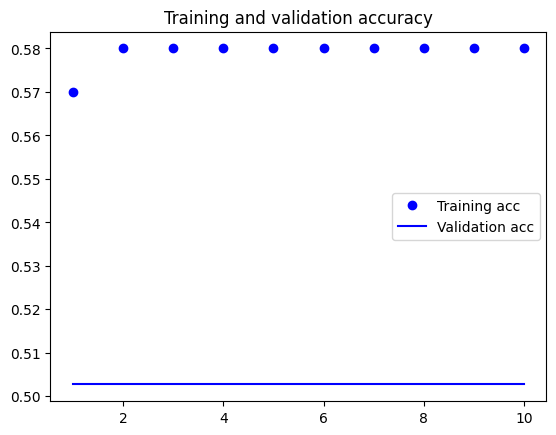

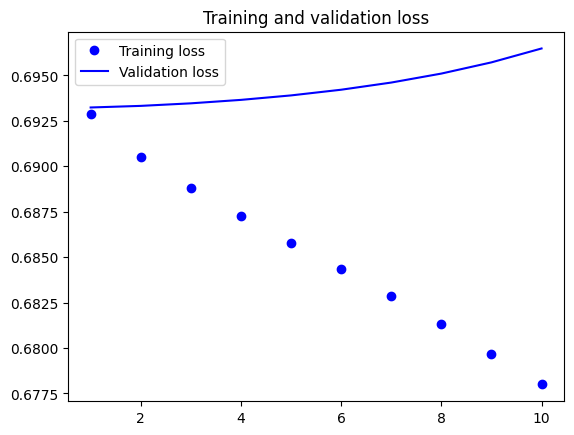

In [33]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(input_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 3s 4ms/step - loss: 0.6969 - acc: 0.5000
Test Loss: 0.6969075202941895
Test Accuracy: 0.5


In [35]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 10000
input_train = input_train[:10000]
y_train = y_train[:10000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
10000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (10000, 150)
input_test shape: (25000, 150)
Epoch 1/10
79/79 [==============================] - 7s 68ms/step - loss: 0.6803 - acc: 0.5601 - val_loss: 0.6317 - val_acc: 0.6732
Epoch 2/10
79/79 [==============================] - 5s 68ms/step - loss: 0.5013 - acc: 0.7712 - val_loss: 0.4364 - val_acc: 0.8282
Epoch 3/10
79/79 [==============================] - 4s 46ms/step - loss: 0.3513 - acc: 0.8587 - val_loss: 0.4375 - val_acc: 0.8259
Epoch 4/10
79/79 [==============================] - 3s 32ms/step - loss: 0.2771 - acc: 0.8929 - val_loss: 0.4863 - val_acc: 0.8222
Epoch 5/10
79/79 [==============================] - 3s 40ms/step - loss: 0.2229 - acc: 0.9205 - val_loss: 0.3789 - val_acc: 0.8346
Epoch 6/10
79/79 [==============================] - 3s 32ms/step - loss: 0.1846 - acc: 0.9352 - val_loss: 0.4700 - val_acc: 0.8378
Epoch 7/10
79/79 [==============================] - 2s 21ms/s

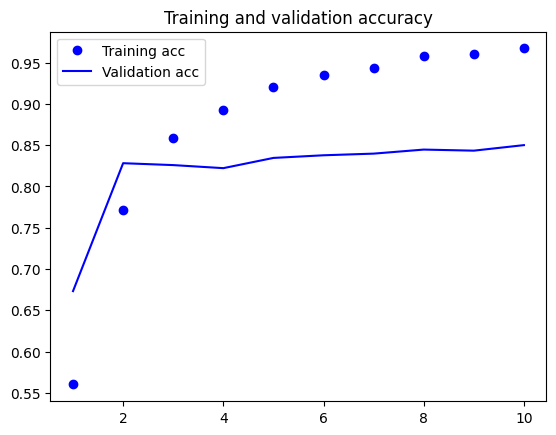

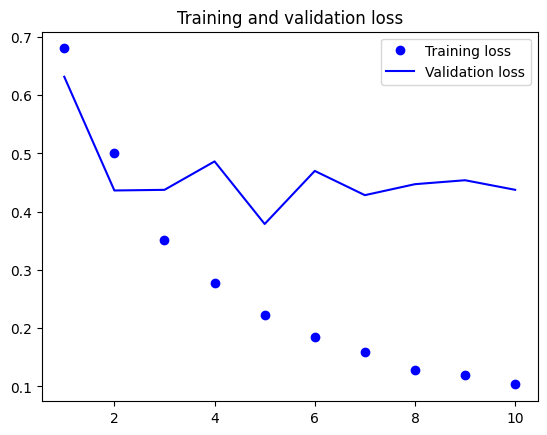

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(input_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 3s 4ms/step - loss: 0.4390 - acc: 0.8498
Test Loss: 0.43895503878593445
Test Accuracy: 0.849839985370636


In [38]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 15000
input_train = input_train[:15000]
y_train = y_train[:15000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
15000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (15000, 150)
input_test shape: (25000, 150)
Epoch 1/10
118/118 [==============================] - 10s 70ms/step - loss: 0.6067 - acc: 0.6597 - val_loss: 0.4961 - val_acc: 0.7522
Epoch 2/10
118/118 [==============================] - 5s 43ms/step - loss: 0.3767 - acc: 0.8462 - val_loss: 0.4367 - val_acc: 0.8223
Epoch 3/10
118/118 [==============================] - 4s 33ms/step - loss: 0.2838 - acc: 0.8889 - val_loss: 0.6853 - val_acc: 0.7752
Epoch 4/10
118/118 [==============================] - 4s 31ms/step - loss: 0.2332 - acc: 0.9128 - val_loss: 0.3751 - val_acc: 0.8490
Epoch 5/10
118/118 [==============================] - 4s 32ms/step - loss: 0.1968 - acc: 0.9279 - val_loss: 0.4463 - val_acc: 0.8395
Epoch 6/10
118/118 [==============================] - 2s 19ms/step - loss: 0.1659 - acc: 0.9410 - val_loss: 0.4523 - val_acc: 0.8465
Epoch 7/10
118/118 [============================

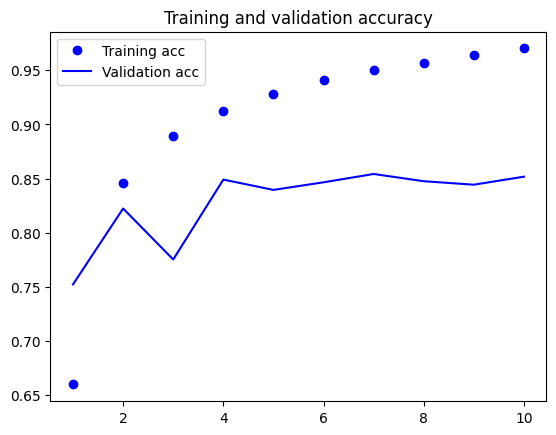

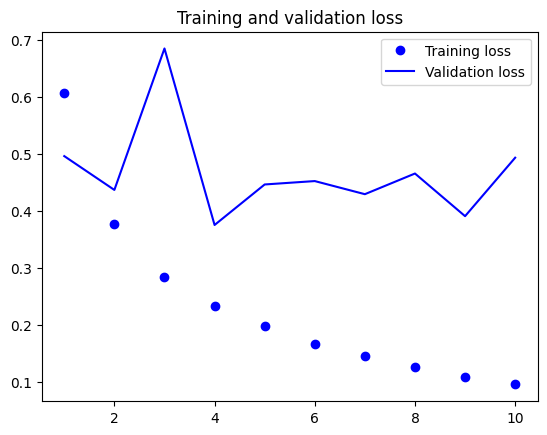

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(input_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 3s 4ms/step - loss: 0.4922 - acc: 0.8495
Test Loss: 0.4921686351299286
Test Accuracy: 0.8494799733161926


In [41]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 17000
input_train = input_train[:17000]
y_train = y_train[:17000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))

Loading data...
17000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (17000, 150)
input_test shape: (25000, 150)
Epoch 1/10
133/133 [==============================] - 11s 68ms/step - loss: 0.5960 - acc: 0.6686 - val_loss: 0.4117 - val_acc: 0.8157
Epoch 2/10
133/133 [==============================] - 5s 39ms/step - loss: 0.3587 - acc: 0.8509 - val_loss: 0.3466 - val_acc: 0.8508
Epoch 3/10
133/133 [==============================] - 6s 42ms/step - loss: 0.2754 - acc: 0.8897 - val_loss: 0.3423 - val_acc: 0.8607
Epoch 4/10
133/133 [==============================] - 3s 23ms/step - loss: 0.2251 - acc: 0.9147 - val_loss: 0.3541 - val_acc: 0.8574
Epoch 5/10
133/133 [==============================] - 3s 22ms/step - loss: 0.1996 - acc: 0.9279 - val_loss: 0.3329 - val_acc: 0.8566
Epoch 6/10
133/133 [==============================] - 3s 19ms/step - loss: 0.1733 - acc: 0.9380 - val_loss: 0.3754 - val_acc: 0.8585
Epoch 7/10
133/133 [============================

In [42]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(input_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 4s 6ms/step - loss: 0.4529 - acc: 0.8435
Test Loss: 0.45287370681762695
Test Accuracy: 0.8434799909591675


In [43]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 17485
input_train = input_train[:17485]
y_train = y_train[:17485]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))

Loading data...
17485 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (17485, 150)
input_test shape: (25000, 150)
Epoch 1/10
137/137 [==============================] - 11s 71ms/step - loss: 0.6003 - acc: 0.6646 - val_loss: 0.4304 - val_acc: 0.8063
Epoch 2/10
137/137 [==============================] - 6s 40ms/step - loss: 0.3528 - acc: 0.8516 - val_loss: 0.4217 - val_acc: 0.8276
Epoch 3/10
137/137 [==============================] - 4s 31ms/step - loss: 0.2755 - acc: 0.8928 - val_loss: 0.3356 - val_acc: 0.8607
Epoch 4/10
137/137 [==============================] - 3s 25ms/step - loss: 0.2285 - acc: 0.9136 - val_loss: 0.3447 - val_acc: 0.8591
Epoch 5/10
137/137 [==============================] - 3s 22ms/step - loss: 0.1983 - acc: 0.9275 - val_loss: 0.3557 - val_acc: 0.8466
Epoch 6/10
137/137 [==============================] - 2s 13ms/step - loss: 0.1752 - acc: 0.9384 - val_loss: 0.4228 - val_acc: 0.8481
Epoch 7/10
137/137 [============================

In [44]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(input_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 3s 4ms/step - loss: 0.4586 - acc: 0.8463
Test Loss: 0.45860373973846436
Test Accuracy: 0.8462799787521362


In [45]:
max_features = 10000  # number of words to consider as features
maxlen = 150  # cut texts after this number of words
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Restrict training samples to 25000
input_train = input_train[:25000]
y_train = y_train[:25000]

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Validate on 10,000 samples
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(input_test[:10000], y_test[:10000]))


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 150)
input_test shape: (25000, 150)
Epoch 1/10
196/196 [==============================] - 14s 62ms/step - loss: 0.5535 - acc: 0.6993 - val_loss: 0.3668 - val_acc: 0.8447
Epoch 2/10
196/196 [==============================] - 6s 32ms/step - loss: 0.3247 - acc: 0.8649 - val_loss: 0.3423 - val_acc: 0.8578
Epoch 3/10
196/196 [==============================] - 6s 29ms/step - loss: 0.2632 - acc: 0.8955 - val_loss: 0.4015 - val_acc: 0.8190
Epoch 4/10
196/196 [==============================] - 3s 17ms/step - loss: 0.2322 - acc: 0.9119 - val_loss: 0.3337 - val_acc: 0.8565
Epoch 5/10
196/196 [==============================] - 2s 12ms/step - loss: 0.2095 - acc: 0.9216 - val_loss: 0.3509 - val_acc: 0.8639
Epoch 6/10
196/196 [==============================] - 2s 12ms/step - loss: 0.1924 - acc: 0.9296 - val_loss: 0.3502 - val_acc: 0.8604
Epoch 7/10
196/196 [============================

In [46]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(input_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

782/782 [==============================] - 3s 4ms/step - loss: 0.3924 - acc: 0.8531
Test Loss: 0.3923910856246948
Test Accuracy: 0.8530799746513367


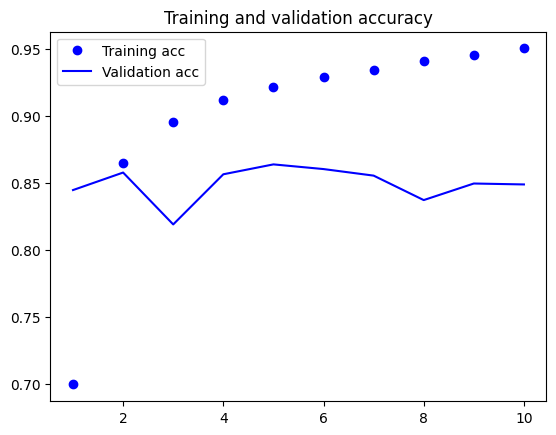

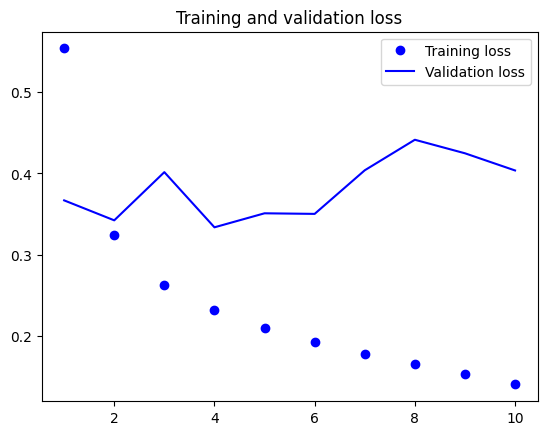

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!tar -xvf /content/drive/MyDrive/aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [50]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [51]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 150  # Cutoff reviews after 150 words
training_samples = 100  # Restrict training samples to 100
validation_samples = 10000  # Validate on 10,000 samples
max_words = 10000  # Consider only the top 10,000 words

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where samples are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Using a pretrained word embedding

In [52]:
glove_dir = '/content/drive/MyDrive/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [53]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [54]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_3 (Flatten)         (None, 15000)             0         
                                                                 
 dense_18 (Dense)            (None, 32)                480032    
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [56]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 1s 264ms/step - loss: 3.0323 - acc: 0.5000 - val_loss: 2.8897 - val_acc: 0.5011
Epoch 2/10
4/4 [==============================] - 1s 187ms/step - loss: 1.4149 - acc: 0.5000 - val_loss: 0.7431 - val_acc: 0.5198
Epoch 3/10
4/4 [==============================] - 1s 221ms/step - loss: 0.3005 - acc: 0.9200 - val_loss: 1.3778 - val_acc: 0.4986
Epoch 4/10
4/4 [==============================] - 1s 263ms/step - loss: 0.7973 - acc: 0.6400 - val_loss: 1.3181 - val_acc: 0.4990
Epoch 5/10
4/4 [==============================] - 1s 268ms/step - loss: 0.1887 - acc: 0.9400 - val_loss: 1.4024 - val_acc: 0.4990
Epoch 6/10
4/4 [==============================] - 1s 436ms/step - loss: 0.1321 - acc: 0.9500 - val_loss: 0.7641 - val_acc: 0.5229
Epoch 7/10
4/4 [==============================] - 1s 218ms/step - loss: 0.0536 - acc: 1.0000 - val_loss: 0.7262 - val_acc: 0.5413
Epoch 8/10
4/4 [==============================] - 1s 218ms/step - loss: 0.0408 - acc: 1.00

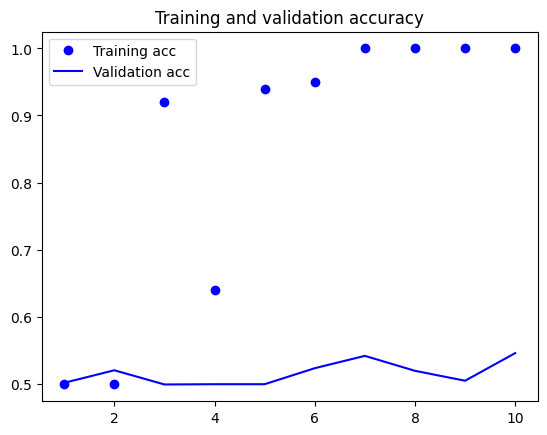

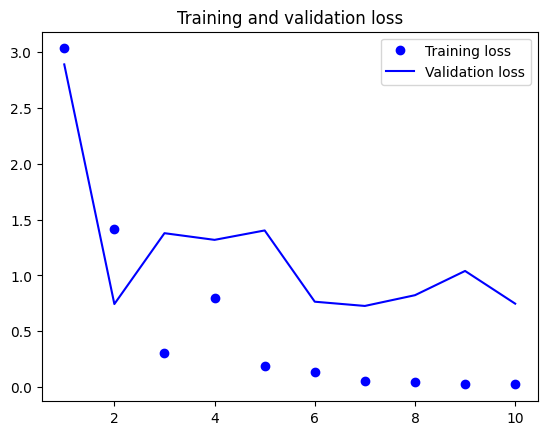

In [57]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_20 (Dense)            (None, 32)                480032    
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 2s 371ms/step - loss: 0.6991 - acc: 0.3800 - val_loss: 0.6926 - val_acc: 0.5069
Epoch 2/10
4/4 [=

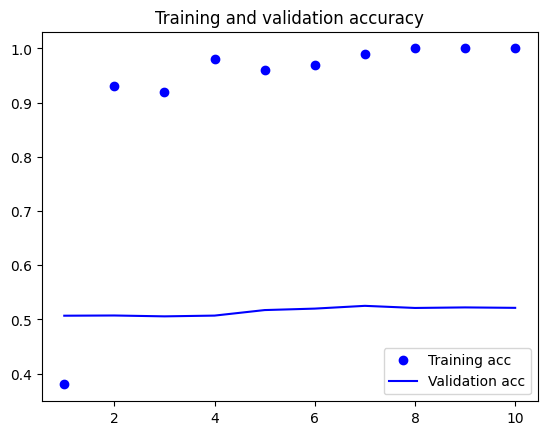

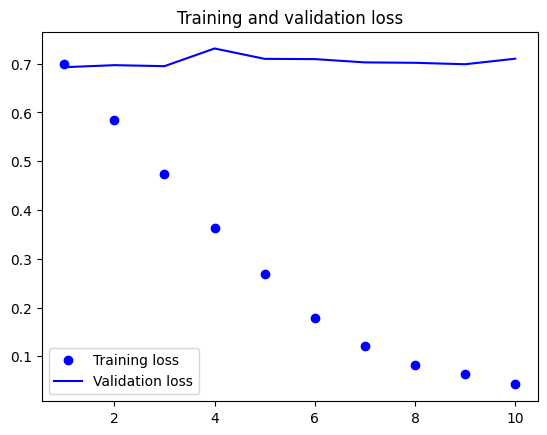

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [60]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [61]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7478 - acc: 0.5421


[0.7477725744247437, 0.5420799851417542]

Usign the above model with more training samples

In [62]:

maxlen = 150  # Cutoff reviews after 150 words
training_samples = 10000  # Restrict training samples to 10000
validation_samples = 10000  # Validate on 10,000 samples
max_words = 10000  # Consider only the top 10,000 words

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where samples are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [63]:
glove_dir = '/content/drive/MyDrive/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [64]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_22 (Dense)            (None, 32)                480032    
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [66]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.7101 - acc: 0.5014 - val_loss: 0.6930 - val_acc: 0.5019
Epoch 2/100
313/313 [==============================] - 1s 5ms/step - loss: 0.6887 - acc: 0.5236 - val_loss: 0.6945 - val_acc: 0.5112
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6738 - acc: 0.5554 - val_loss: 0.6910 - val_acc: 0.5404
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6349 - acc: 0.6242 - val_loss: 0.7358 - val_acc: 0.5580
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5648 - acc: 0.6884 - val_loss: 0.7104 - val_acc: 0.5631
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 0.4905 - acc: 0.7341 - val_loss: 0.8456 - val_acc: 0.5421
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 0.4225 - acc: 0.7947 - val_loss: 0.7801 - val_acc: 0.5657
Epoch 8/100
313/313 [==============================] - 1s 5ms/step - 

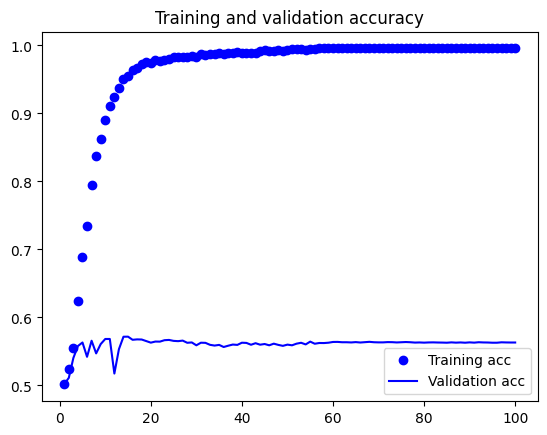

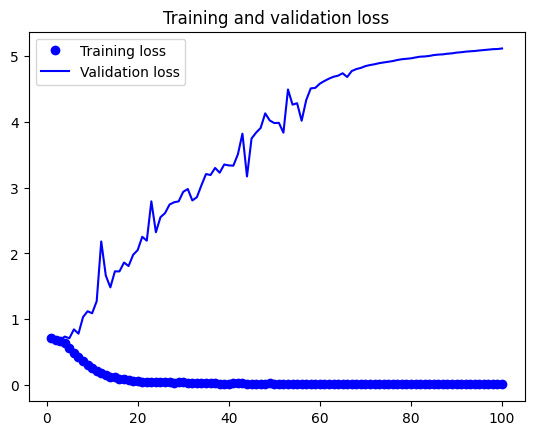

In [67]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [68]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 5.0936 - acc: 0.5713


[5.093585968017578, 0.5713199973106384]